# Data Visualization project: Airline Safety

### Purpose: find interesting information and explore if an airline is risky to travel in?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### We start off by loading the dataset and taking a look at the features available to us.

In [2]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
df = pd.read_csv(url)

In [3]:
df.head(15)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [4]:
df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [5]:
df.shape

(56, 8)

Just a quick check to see if there are any repeated airlines

In [6]:
len(df.airline.unique())

56

To breakdown the features we are given: 

1. airline = Name of the airline 
- available seat per km = The number of seats available (not how many were filled) multiplied by the number of kilometers the airline flies
- incidents = total number of incidents whether fatal or not
- fatal accidents = accidents out of all the fatalities that result in death
- fatalities = fatalities

All three of 'incidents', 'fatal accidents' and 'fatalities' are given as aggregated numbers over two time periods: 1985-1999 and 2000-2014. 
***

## Data Cleaning

First things first, before we dive into the data to answer the question, we first need to ensure that the data is clean. Once this is done, we can confidently move on to exploring the dataset.

For data cleaning, we will check for:

 a. missing values 
 
 b. consistency in data type format (to help with quick visualizations)
 
 c. corrupt/false data – by taking a quick look at the summary stats 
 
 d. any other sanity checks to check for typos/inconsistencies


Pandas allows us to check for both the data type as well as presence of any missing values by using `.info()`.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


Seems like we don't have any missing values. Moreover, other than the airline column, all the remaining columns are of the integer type which is what we expected.

Now we'll look at the summary stats to pick any anomalies that might stand out.

In [8]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


Taking a quick look at the stats from the above table, the mean of incidents over the two time periods seem to have 
gone down. Similarly, fatal_accidents and fatalities both show a decline in mean which seems to show that overall, almost all airlines have shown an improvement in accidents.

The 75th percentile also shows that 75 percent of data has 184 fatalities for the 1985-1999 time period
while the max being 535 shows that this is certainly an anomaly. Same goes with the fatalities from 2000-2014. 

Looking at the 50th and 75th percentiles in the 2000-2014 time period for fatalities, it shows that 50 percent of
airlines seems to have had no fatalities. The max number of fatalities, however, seem to have increased. It would be 
interesting to explore which airline this correponds to and whether it is the same airline.

In [9]:
df.airline[df.fatalities_85_99 == df.fatalities_85_99.max()]

16    China Airlines
Name: airline, dtype: object

In [10]:
df.airline[df.fatalities_00_14 == df.fatalities_00_14.max()]

34    Malaysia Airlines
Name: airline, dtype: object

The airline with maximum fatalities do not match in the two time periods.

One sanity check would be to ensure that for every instance with no fatalities also has 0 fatal accidents as naturally any fatal accidents would be counted toward fatalities. Moreoever, the number of fatal accidents should be 
less compared to fatalities.

In [11]:
def sanity_check():
    '''
    Check for:
    - fatal accidents to be less than fatalities. 
    - fatal accidents to be 0 in the case of fatalities adding up to 0.
    '''
    
    bug_85, bug_85_gt = 0, 0
    bug_00, bug_00_gt = 0, 0
    
    for i in range(0, len(df)):
        # Checking the first period
        if df.fatalities_85_99.iloc[i] == 0 and df.fatal_accidents_85_99.iloc[i] != 0:
            bug_85 =+ 1
        if df.fatalities_85_99.iloc[i] < df.fatal_accidents_85_99.iloc[i]:
            bug_85_gt =+ 1
        # Checking the second period
        if df.fatalities_00_14.iloc[i] == 0 and df.fatal_accidents_00_14.iloc[i] != 0:
            bug_00 =+ 1
        if df.fatalities_00_14.iloc[i] < df.fatal_accidents_00_14.iloc[i]:
            bug_00_gt =+ 1
            
    return bug_85, bug_85_gt, bug_00, bug_00_gt
            
        

In [12]:
sanity_check()

(0, 0, 0, 0)

Good! The sanity check shows that the data is consistent according to our expectation! 
Next, let's check if there are any airlines that are consistently scoring high when it comes to fatalities in both time periods. Here the criteria for "high" is defined as falling in the top 10 highest fatalities list. 

### Fatalities

In [13]:
def top_X(df, col, X):
    '''
    Purpose: Finds the top ten airlines and their corresponding values based on a given col.
    
    Input:
     - df: dataframe
     - df.col: column name to be sorted
     - X: top X number of airlines
     
    Output: 
     - list 1: airlines names
     - list 2: counts
     - list 3: index of the counts

    '''
    
    sorted_list = col.sort_values(ascending=False).head(X)
    sorted_list_index = sorted_list.index.tolist()
    
    airline_name = []
    for item in sorted_list_index:
        #print(df.airline.iloc[item])
        airline_name.append(df.airline.iloc[item])
        
    # Remove the asterisk symbol from the airlines
    airline_name = list(map(lambda each:each.strip("*"), airline_name))
    
    return airline_name, sorted_list, sorted_list_index


In [14]:
airline_fatalities_85, sorted_85, sorted_85_index =  top_X(df, df.fatalities_85_99, 10)

In [15]:
airline_fatalities_00, sorted_00, sorted_00_index =  top_X(df, df.fatalities_00_14, 10)

Below, we show the 10 airlines that had the most number of fatalities in the 1985-1999 period.

Text(0,0.5,'Number of fatalities: 1985-1999')

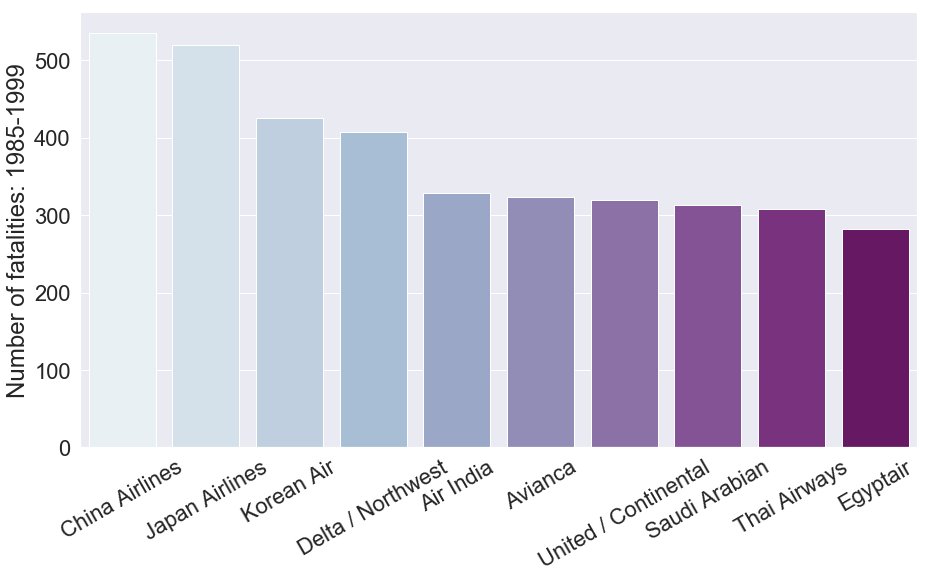

In [16]:
plt.figure(figsize=(15,8))
sb.set(font_scale=2)  
g = sb.barplot(airline_fatalities_85, sorted_85, palette= sb.color_palette("BuPu", 10))
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_ylabel('Number of fatalities: 1985-1999')

Similarly, the airlines that had the most number of fatalities in the 2000-2014 period are shown below.

Text(0,0.5,'Number of fatalities: 2000-2014')

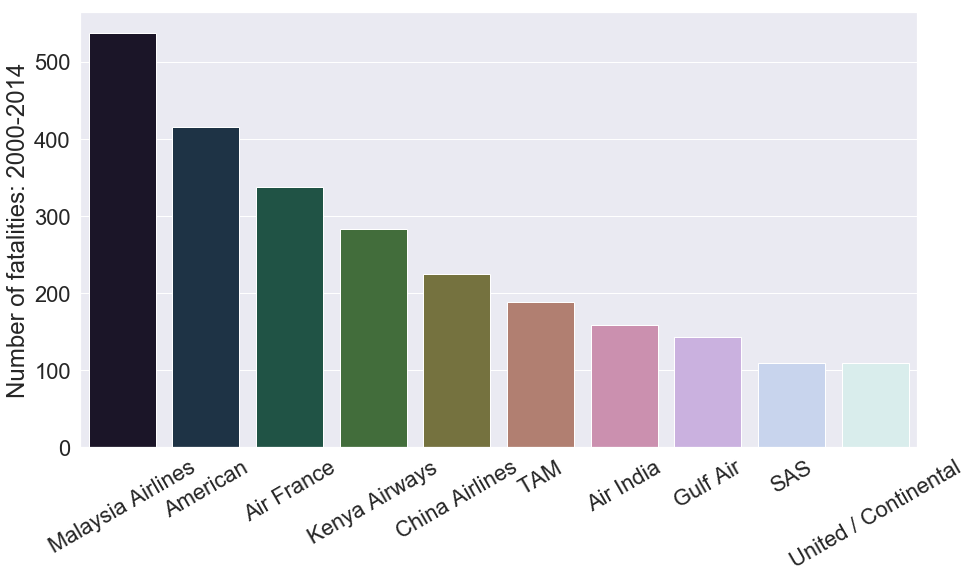

In [17]:
plt.figure(figsize=(15,8))
g = sb.barplot(airline_fatalities_00, sorted_00,palette="cubehelix")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_ylabel('Number of fatalities: 2000-2014')

Let's find out which airlines had most fatalities (defined as per our criteria of being in the top 10 list out of 56 airlines) consistently in both periods.

In [18]:
def common_airlines(index_85, index_00, feature_85, feature_00):
    '''
    Purpose: finds the common airlines between two time periods
    
    Input:
    - index_85: sorted airline index for highest value of a feature for 1985-1999 time period
    - index_00: ^^ for 1999-2000 time period
    - feature_85: chosen feature for 1985-1999 time period
    - feature_00: ^^ for 1999-2000 time period
    
    Output:
    - common: list of indices of airlines that are found in both periods
    '''
    
    common = [i for i in index_85 if i in index_00]
    for i in common:
        print(df.airline.iloc[i], feature_85.iloc[i], feature_00.iloc[i])
        
    return common

In [19]:
consistent_fatalities = common_airlines(sorted_85_index, sorted_00_index, df.fatalities_85_99, df.fatalities_00_14)

China Airlines 535 225
Air India* 329 158
United / Continental* 319 109


### Incidents

Now lets see the airlines with the most number of incidents:

In [20]:
df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [21]:
airline_incidents_85, sorted_inc_85, sorted_inc_85_index =  top_X(df, df.incidents_85_99, 10)

[Text(0,0,'Aeroflot'),
 Text(0,0,'Ethiopian Airlines'),
 Text(0,0,'Delta / Northwest'),
 Text(0,0,'American'),
 Text(0,0,'United / Continental'),
 Text(0,0,'US Airways / America West'),
 Text(0,0,'Air France'),
 Text(0,0,'Korean Air'),
 Text(0,0,'China Airlines'),
 Text(0,0,'Garuda Indonesia')]

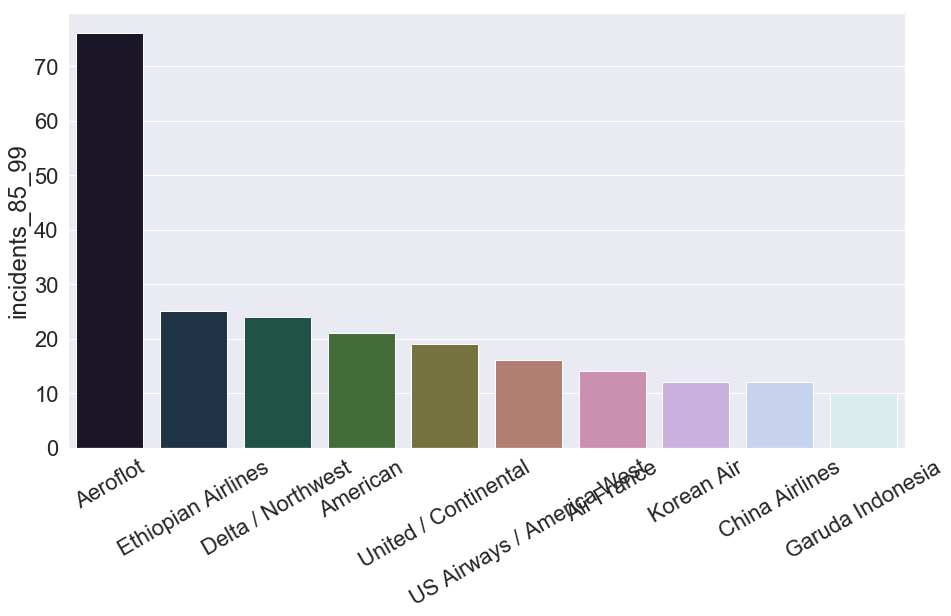

In [22]:
plt.figure(figsize=(15,8))
g = sb.barplot(airline_incidents_85, sorted_inc_85,palette="cubehelix")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [23]:
airline_incidents_00, sorted_inc_00, sorted_inc_00_index =  top_X(df, df.incidents_00_14, 10)

[Text(0,0,'Delta / Northwest'),
 Text(0,0,'American'),
 Text(0,0,'United / Continental'),
 Text(0,0,'US Airways / America West'),
 Text(0,0,'Saudi Arabian'),
 Text(0,0,'Pakistan International'),
 Text(0,0,'Turkish Airlines'),
 Text(0,0,'Southwest Airlines'),
 Text(0,0,'TAM'),
 Text(0,0,'All Nippon Airways')]

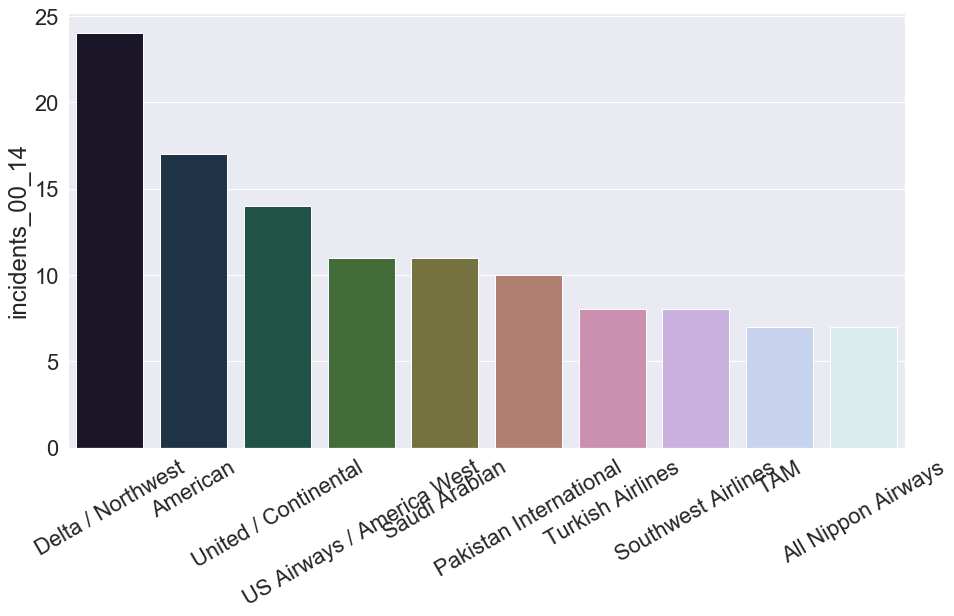

In [24]:
plt.figure(figsize=(15,8))
g = sb.barplot(airline_incidents_00, sorted_inc_00, palette="cubehelix")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Airlines with most number of incidents in both periods.

In [25]:
consistent_incidents = common_airlines(sorted_inc_85_index, sorted_inc_00_index, df.incidents_85_99, df.incidents_00_14)

Delta / Northwest* 24 24
American* 21 17
United / Continental* 19 14
US Airways / America West* 16 11


In [26]:
df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [92]:
airline_kms_flown, sorted_kms, sorted_kms_index =  top_X(df, df.avail_seat_km_per_week, 10)



In [93]:
airline_kms_flown

['United / Continental',
 'Delta / Northwest',
 'American',
 'Lufthansa',
 'Southwest Airlines',
 'British Airways',
 'Air France',
 'Cathay Pacific',
 'US Airways / America West',
 'Singapore Airlines']

[Text(0,0,'United / Continental'),
 Text(0,0,'Delta / Northwest'),
 Text(0,0,'American'),
 Text(0,0,'Lufthansa'),
 Text(0,0,'Southwest Airlines'),
 Text(0,0,'British Airways'),
 Text(0,0,'Air France'),
 Text(0,0,'Cathay Pacific'),
 Text(0,0,'US Airways / America West'),
 Text(0,0,'Singapore Airlines')]

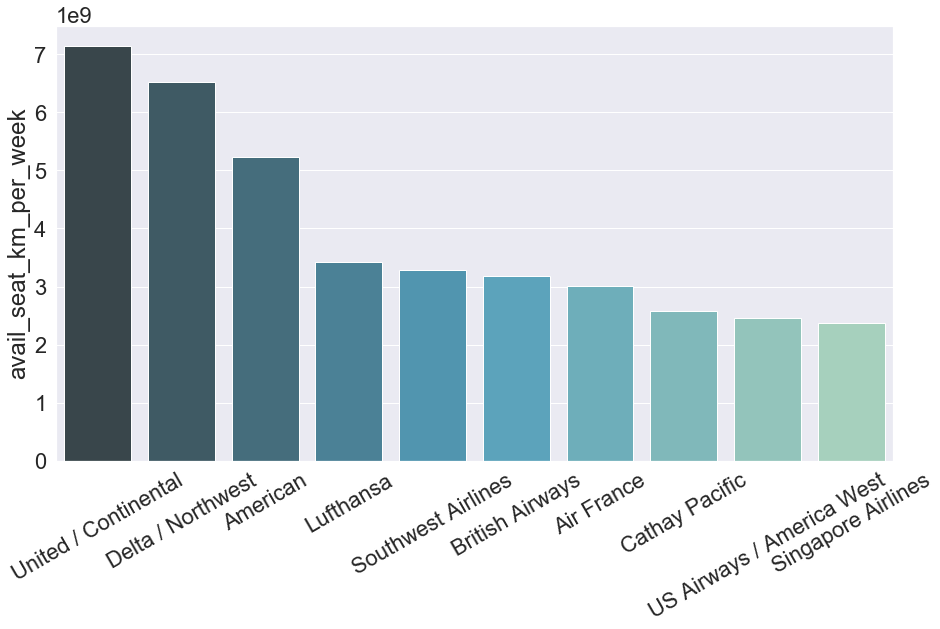

In [97]:
plt.figure(figsize=(15,8))
g = sb.barplot(airline_kms_flown, sorted_kms, palette=sb.color_palette("GnBu_d", 10))
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Next, lets explore if there is a correlation between the three incidents over the two time periods.

Text(0,0.5,'fatalities: 00_14')

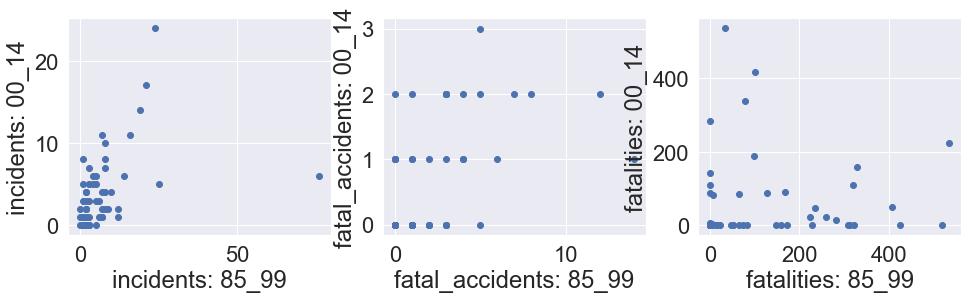

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.scatter(df.incidents_85_99, df.incidents_00_14)
ax1.set_xlabel('incidents: 85_99')
ax1.set_ylabel('incidents: 00_14')

ax2.scatter(df.fatal_accidents_85_99, df.fatal_accidents_00_14)
ax2.set_xlabel('fatal_accidents: 85_99')
ax2.set_ylabel('fatal_accidents: 00_14')

ax3.scatter(df.fatalities_85_99, df.fatalities_00_14)
ax3.set_xlabel('fatalities: 85_99')
ax3.set_ylabel('fatalities: 00_14')

Clearly, there is some correlation between incidents in both time ranges. Fatal accidents and fatalities do not show any correlation. 

Let's plot incidents using the jointplot functionality of seaborn which will allow us to see the density of the points as well as the individual distributions of incidents over the two time periods.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


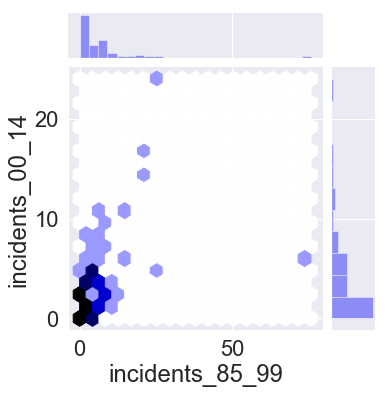

In [47]:
sb.jointplot(x=df.incidents_85_99, y=df.incidents_00_14, kind="hex", color="blue");


In [48]:
# Picking out anomalies 

In [61]:
df.incidents_85_99.mean(), df.incidents_85_99.std(), df.incidents_85_99.mean()+df.incidents_85_99.std() # mean and std. for incidents: 1985-1999

(7.178571428571429, 11.035656495456639, 18.214227924028066)

In [37]:
df.incidents_00_14.mean(), df.incidents_00_14.std() # mean and std. for incidents: 2000-2014

(4.125, 4.544977247667823)

In [86]:
df_new = df[df.incidents_85_99<= df.incidents_85_99.mean()+2*df.incidents_85_99.std()]

In [87]:
len(df_new)

55

In [88]:
df_new_final_inc = df_new[df_new.incidents_00_14<= df_new.incidents_00_14.mean()+2*df_new.incidents_00_14.std()]

In [89]:
len(df_new_final_inc)

52

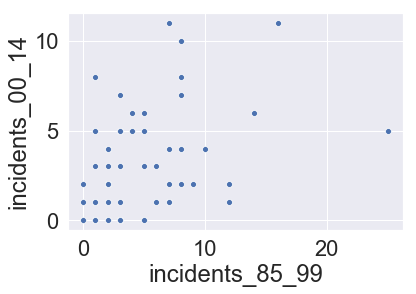

In [90]:
sb.scatterplot(x=df_new_final_inc.incidents_85_99, y=df_new_final_inc.incidents_00_14)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


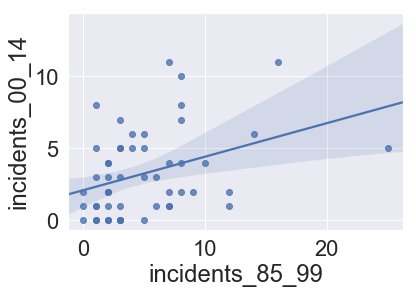

In [91]:
sb.regplot(x=df_new_final_inc.incidents_85_99, y=df_new_final_inc.incidents_00_14)